In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Bank of America
BAC = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/BAC.csv', index_col='Date', parse_dates=True)

# JP Morgan
JPM = pd.read_csv("/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/RY.csv",parse_dates=True,index_col='Date')

In [3]:
portfolio_list = [BAC,JPM,C,HSBC,RY]
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

Returns Analysis:

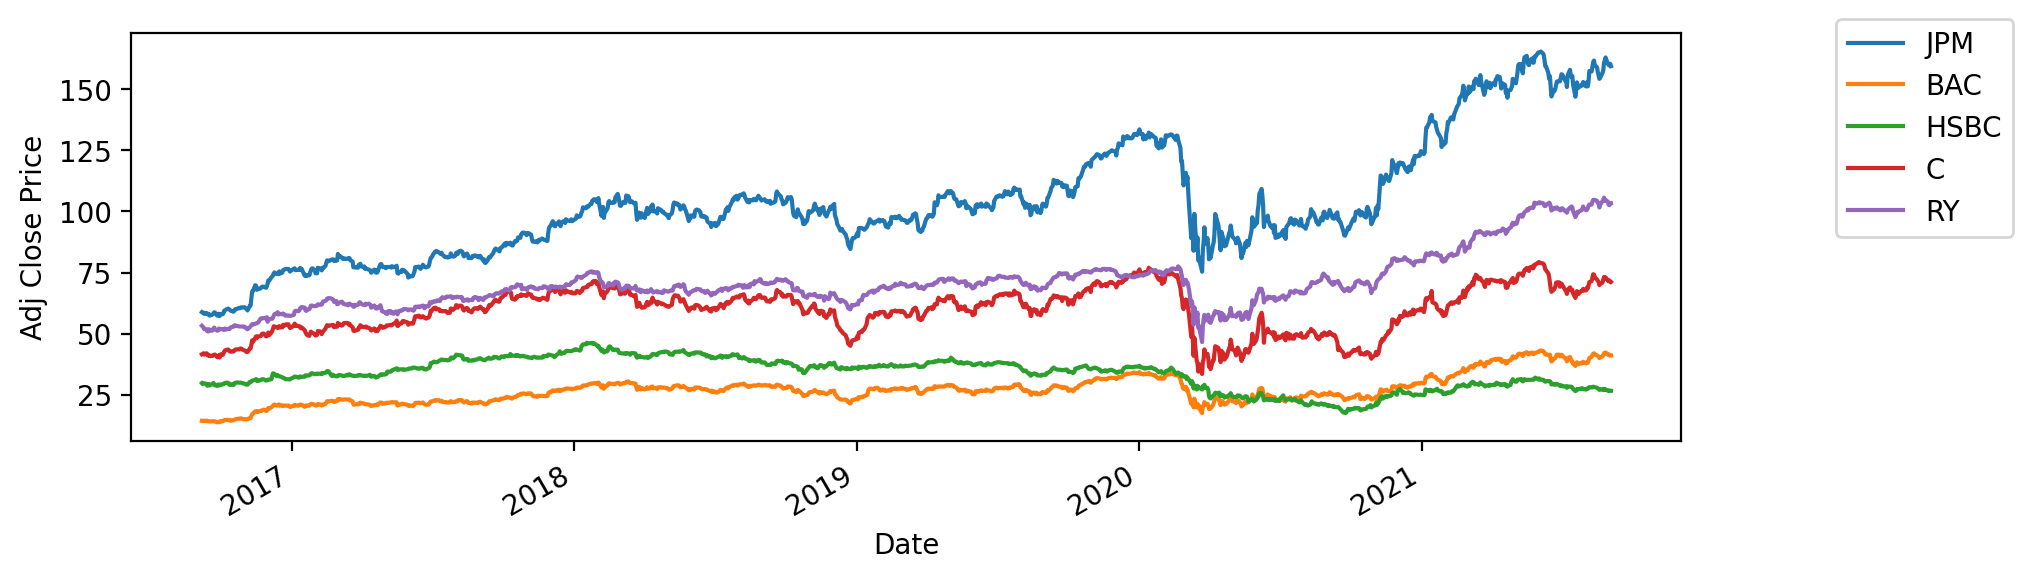

In [43]:
plt.figure(dpi=200, figsize=(10,3))
JPM['Adj Close'].plot(label='JPM')
BAC['Adj Close'].plot(label='BAC')
HSBC['Adj Close'].plot(label='HSBC')
C['Adj Close'].plot(label='C')
RY['Adj Close'].plot(label='RY')
plt.ylabel('Adj Close Price')
plt.legend(loc=(1.1,0.5))

In [6]:
def perc_calc(ticker,start_date,end_date):
    if start_date not in ticker['Adj Close'].index or end_date not in ticker['Adj Close'].index:
        return 'Dates are not valid'
    adj_start=ticker['Adj Close'][start_date]
    adj_end=ticker['Adj Close'][end_date]
    pctChange= ((adj_end-adj_start)/adj_start)*100
    return f"{pctChange}%"

In [8]:
print(perc_calc(BAC,'2016-09-06','2021-09-03'))
print(perc_calc(JPM,'2016-09-06','2021-09-03'))
print(perc_calc(HSBC,'2016-09-06','2021-09-03'))
print(perc_calc(C,'2016-09-06','2021-09-03'))
print(perc_calc(RY,'2016-09-06','2021-09-03'))

187.73603116885738%
171.39606239022447%
-10.438393110683167%
71.40761468896588%
94.29018565031058%


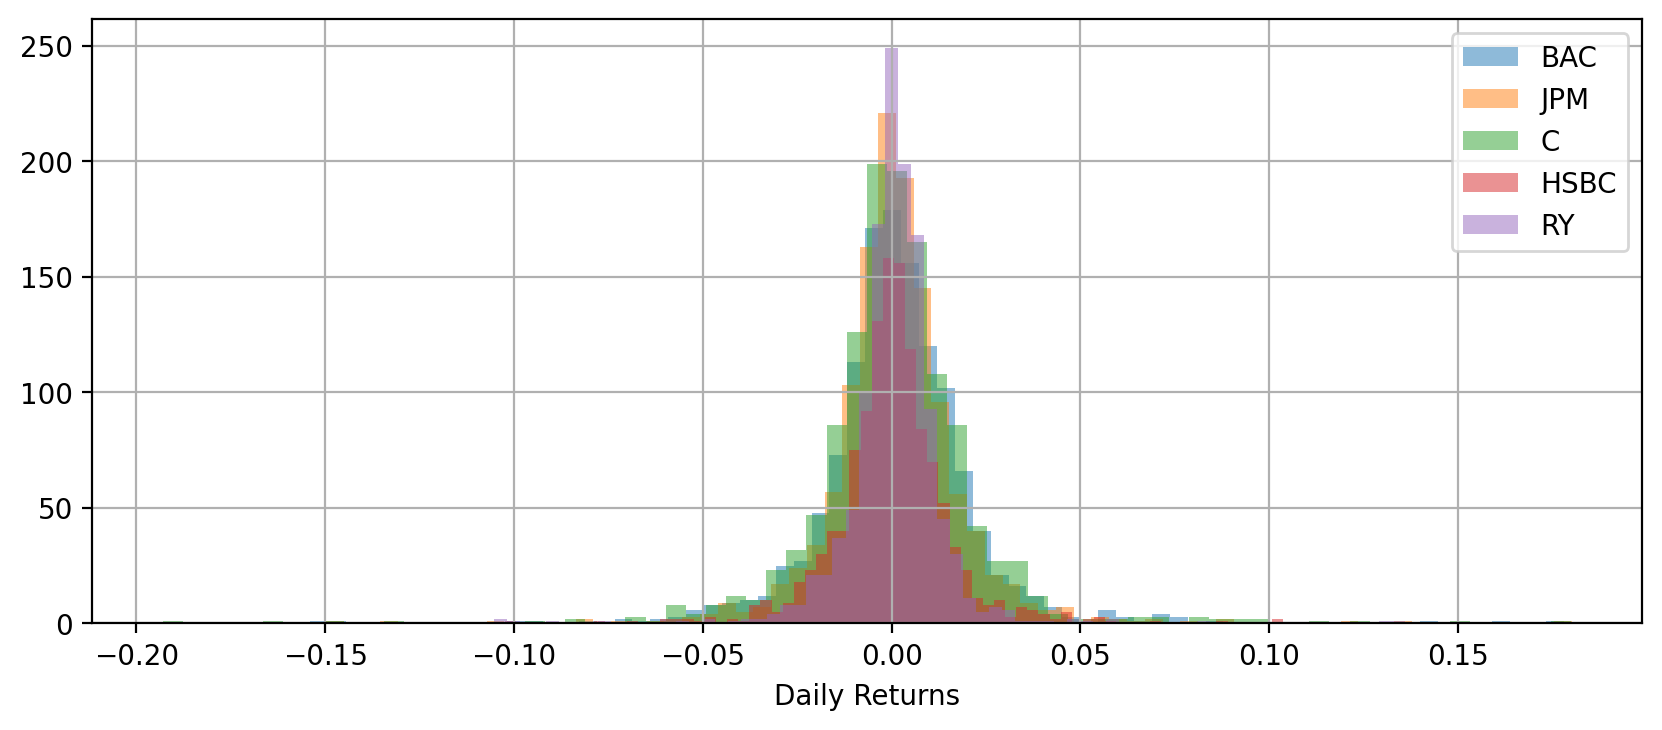

In [9]:
plt.figure(dpi=200, figsize=(10,4))
for ticker,df in portfolio_dict.items():
    df['Adj Close'].pct_change(1).hist(label=ticker,alpha=0.5,bins=70)
    
plt.xlabel("Daily Returns")
plt.legend()

In [10]:
#Finding the Cumulative Returns of each stock
def cumReturns(df):
    returns= df['Adj Close'].pct_change(1)[1:]
    cumRet=(returns+1).cumprod()
    return cumRet*1000

In [11]:
BAC_Val=cumReturns(BAC)
JPM_Val=cumReturns(JPM)
HSBC_Val=cumReturns(HSBC)
C_Val=cumReturns(C)
RY_Val=cumReturns(RY)

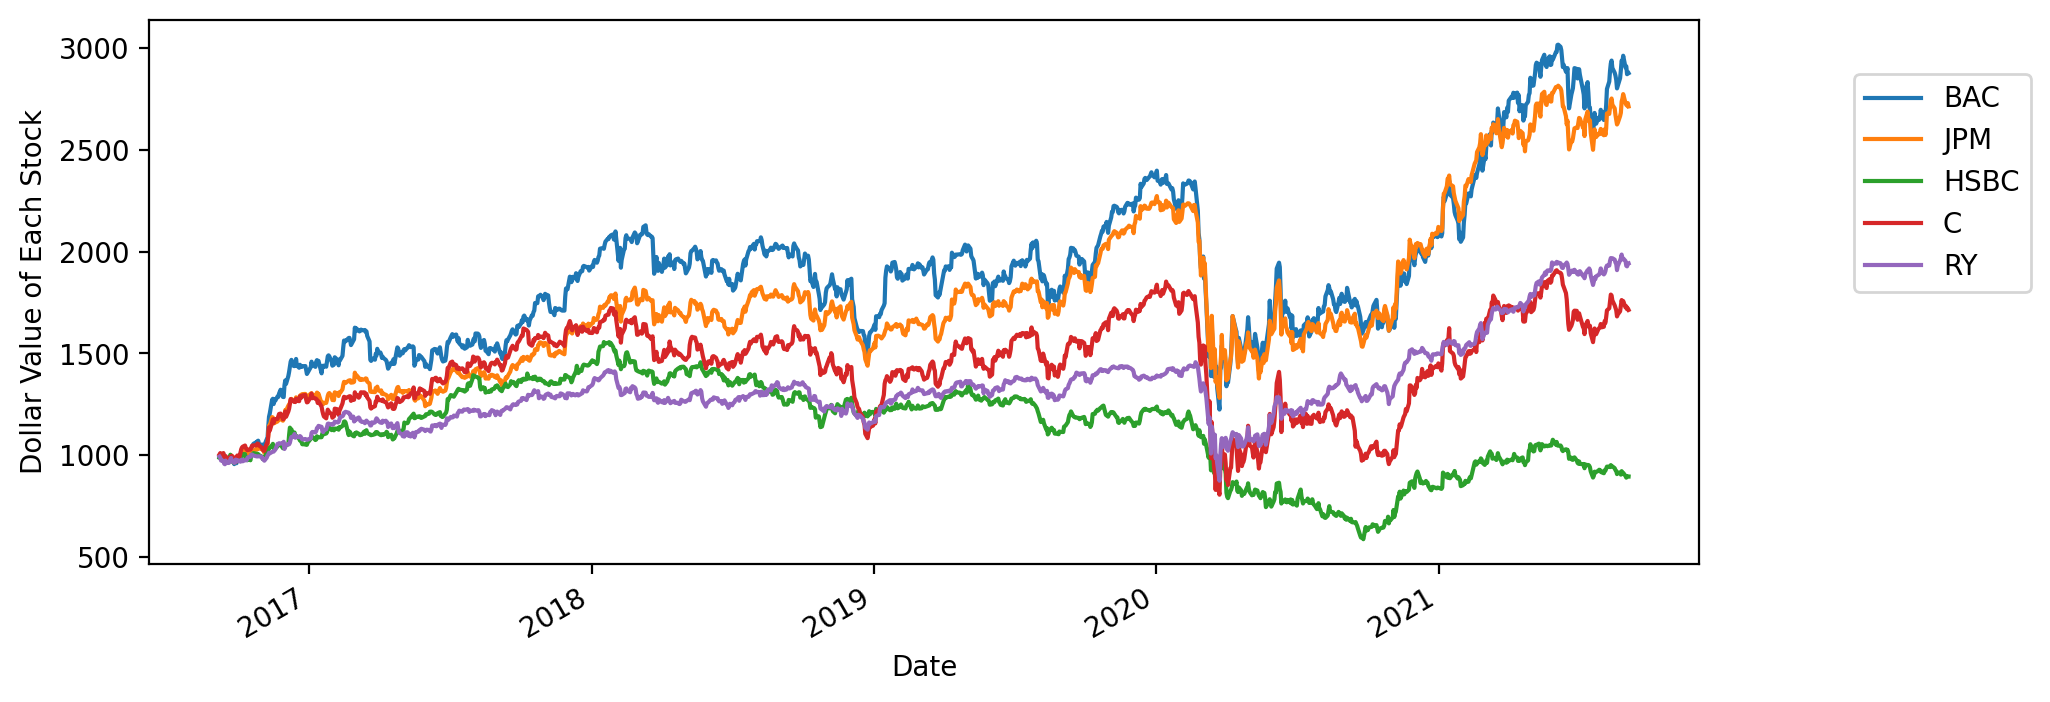

In [16]:
plt.figure(dpi=200,figsize=(10,4))
BAC_Val.plot(label='BAC',ylabel='Dollar Value of Each Stock')
JPM_Val.plot(label='JPM')
HSBC_Val.plot(label='HSBC')
C_Val.plot(label='C')
RY_Val.plot(label='RY')
plt.legend(loc=(1.1,0.5))


In [13]:
#Annualized Sharpe Ratio Calculations:
def findSR(df, rf=0.0):
    df['Daily Returns']=df['Adj Close'].pct_change(1)
    df=df.dropna()
    meanRet=df['Daily Returns'].mean()
    stdDev=df['Daily Returns'].std()
    Sharpe=((meanRet-rf)/stdDev)
    return Sharpe*(252**.5)

In [14]:
print(findSR(BAC))
print(findSR(JPM))
print(findSR(C))
print(findSR(HSBC))
print(findSR(RY))

0.7947267104783096
0.8165069200136568
0.47918276513516356
0.03389350547471227
0.7323176596668234


Volume Analysis:

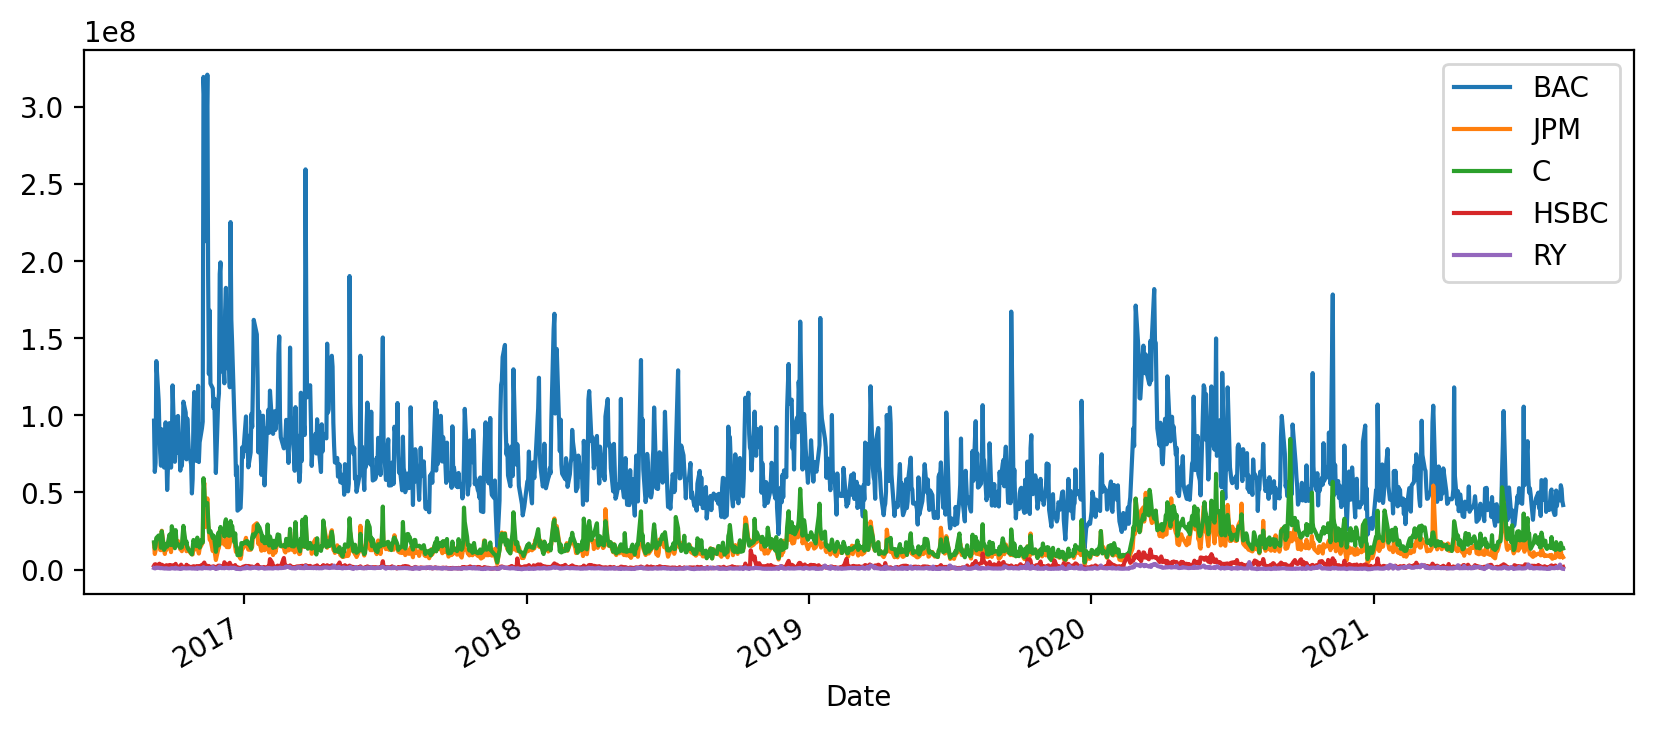

In [17]:
#a plot showing the daily volume of stock traded over the time period of 5 years
plt.figure(dpi=200,figsize=(10,4))
BAC['Volume'].plot(label='BAC')
JPM['Volume'].plot(label='JPM')
C['Volume'].plot(label='C')
HSBC['Volume'].plot(label='HSBC')
RY['Volume'].plot(label='RY')
plt.legend()

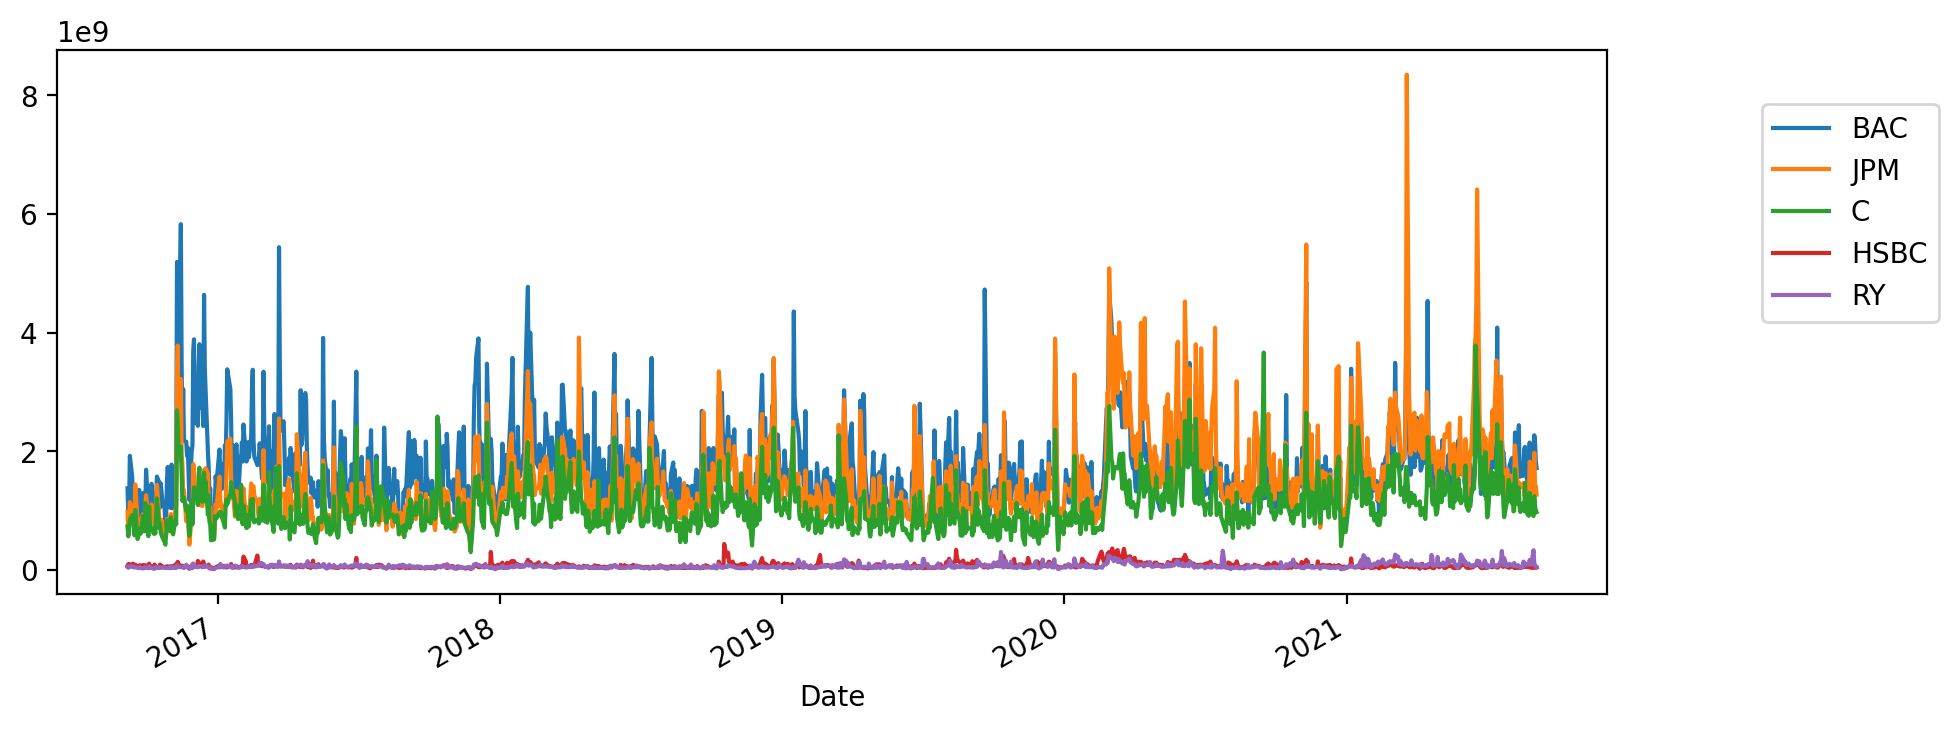

In [18]:
#a graph of the dollar amount traded over the 5 year period
plt.figure(dpi=200,figsize=(10,4))
(BAC['Adj Close']*BAC['Volume']).plot(label='BAC')
(JPM['Adj Close']*JPM['Volume']).plot(label='JPM')
(C['Adj Close']*C['Volume']).plot(label='C')
(HSBC['Adj Close']*HSBC['Volume']).plot(label='HSBC')
(RY['Adj Close']*RY['Volume']).plot(label='RY')
plt.legend(loc=(1.1,0.5))

In [19]:
#Analysis on the highest amount (dollar value) traded
(JPM['Volume']*JPM['Adj Close']).max()

8345011203.784801

In [20]:
(BAC['Volume']*BAC['Adj Close']).max()

5826749354.1865

In [21]:
#And the lowest
(RY['Volume']*RY['Adj Close']).min()

13895619.819200002

In [22]:
(HSBC['Volume']*HSBC['Adj Close']).max()

438668471.79359996

Technical Analysis: 60-Day Moving Averages, Bollinger Bands

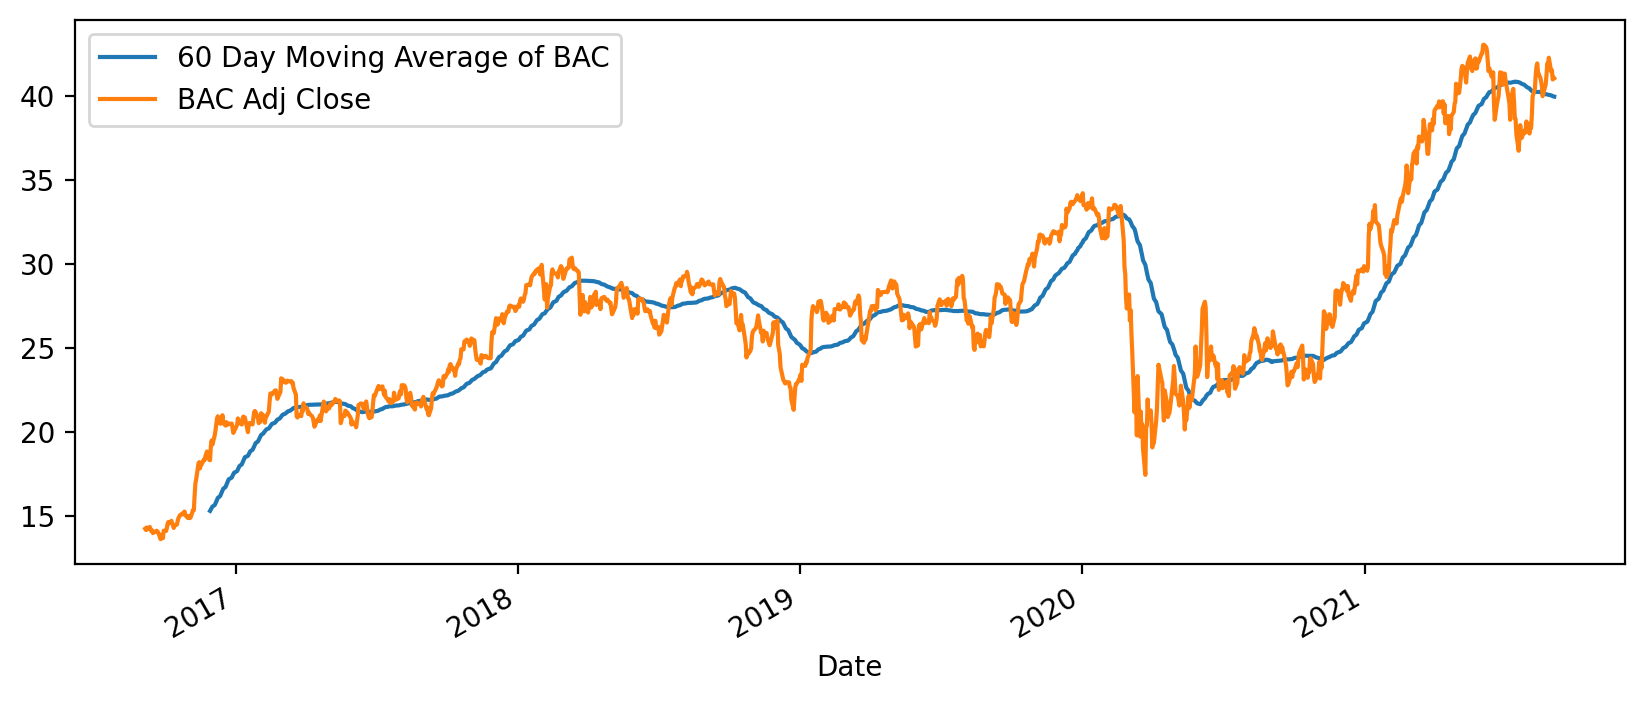

In [24]:
plt.figure(dpi=200,figsize=(10,4))
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 Day Moving Average of BAC')
BAC['Adj Close'].plot(label='BAC Adj Close')
plt.legend()

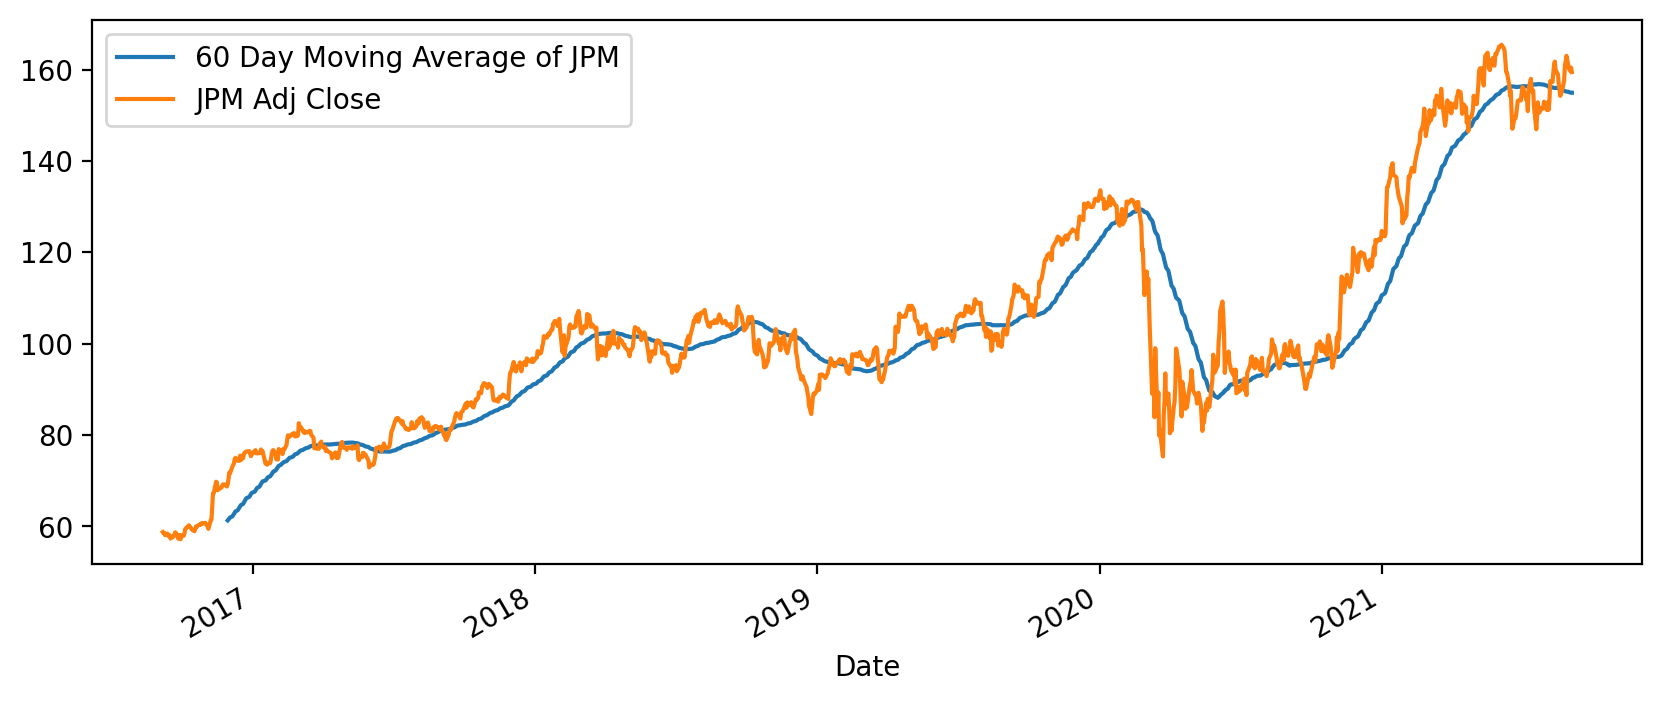

In [25]:
plt.figure(dpi=200,figsize=(10,4))
JPM['Adj Close'].rolling(window=60).mean().plot(label='60 Day Moving Average of JPM')
JPM['Adj Close'].plot(label='JPM Adj Close')
plt.legend()

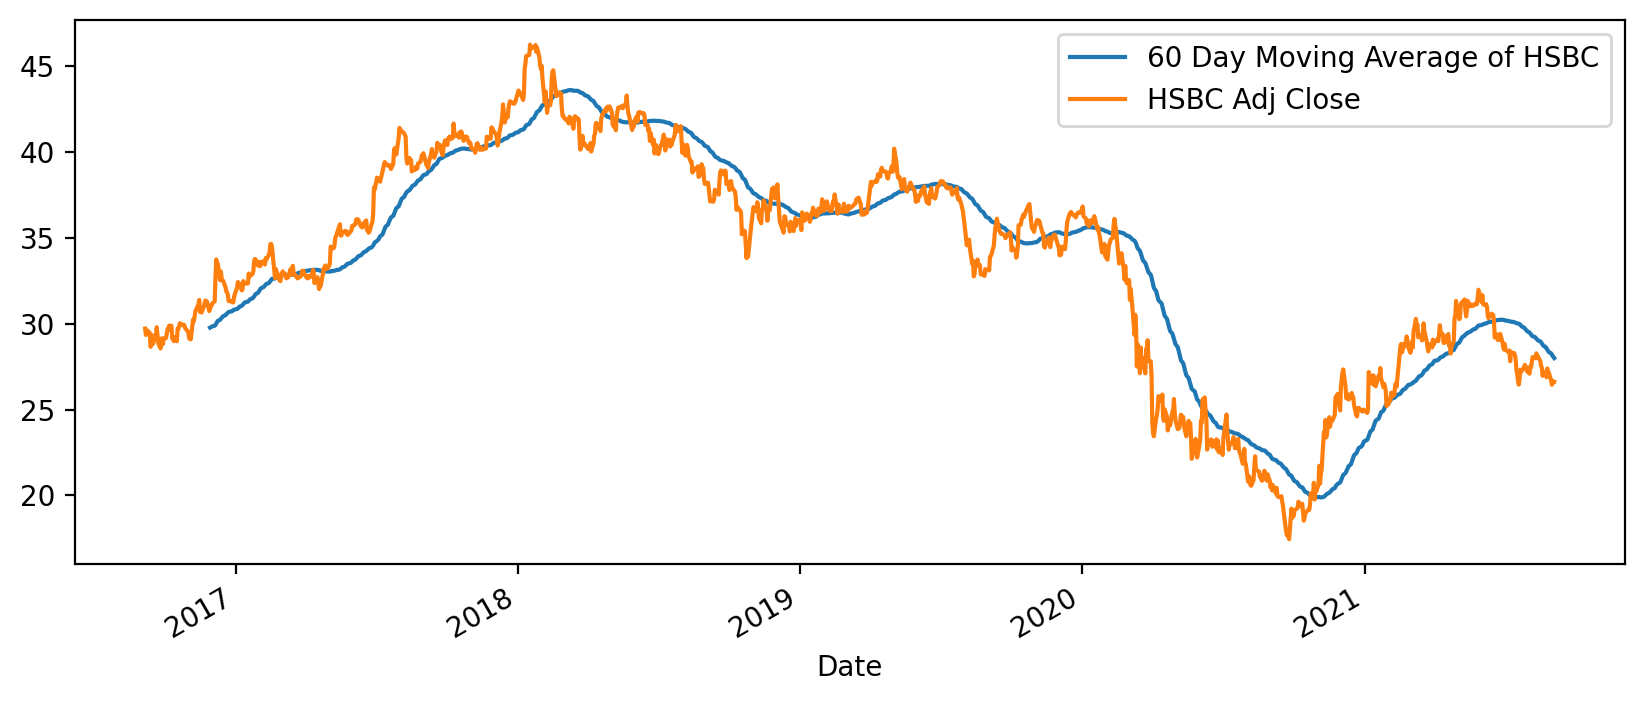

In [26]:
plt.figure(dpi=200,figsize=(10,4))
HSBC['Adj Close'].rolling(window=60).mean().plot(label='60 Day Moving Average of HSBC')
HSBC['Adj Close'].plot(label='HSBC Adj Close')
plt.legend()

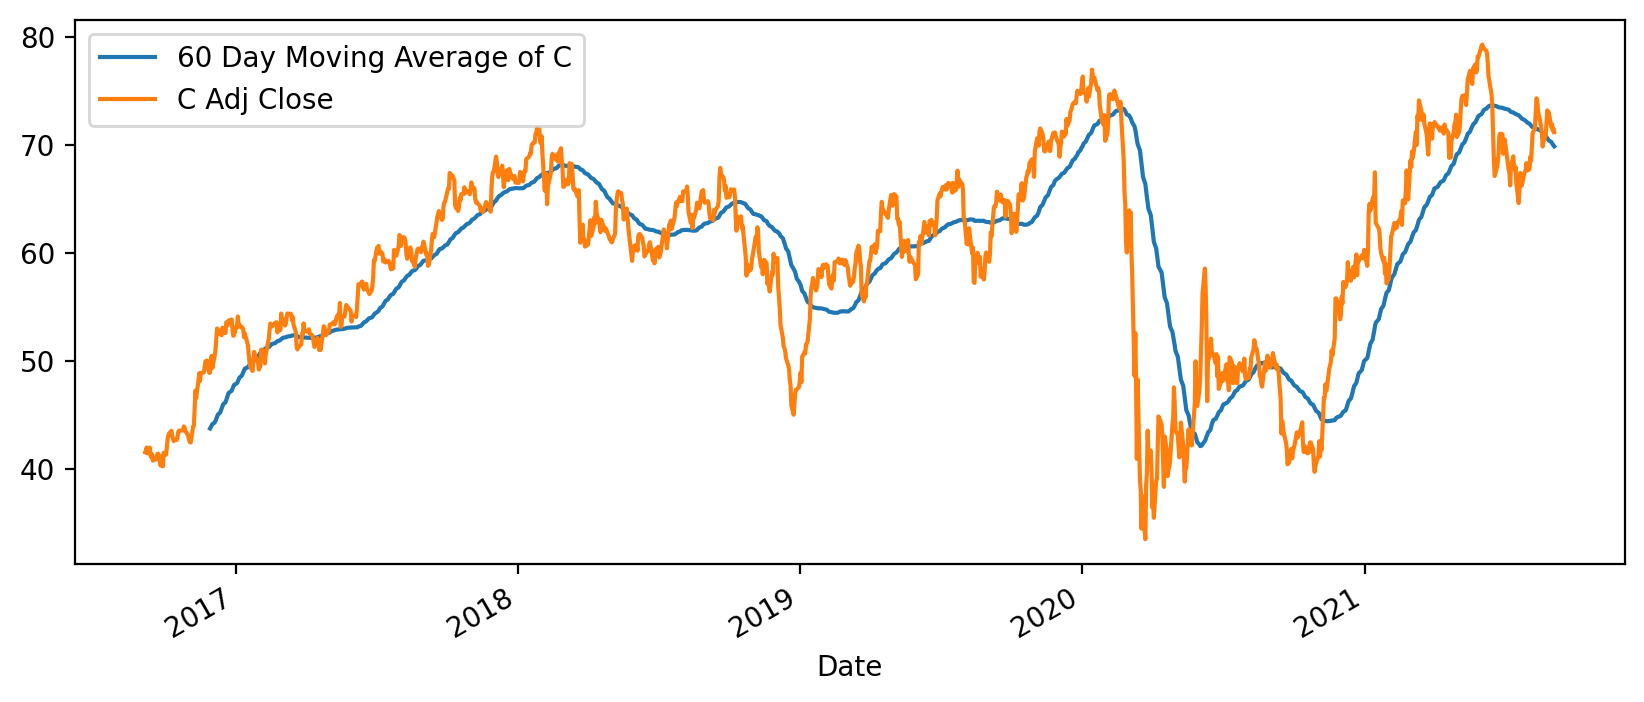

In [27]:
plt.figure(dpi=200,figsize=(10,4))
C['Adj Close'].rolling(window=60).mean().plot(label='60 Day Moving Average of C')
C['Adj Close'].plot(label='C Adj Close')
plt.legend()

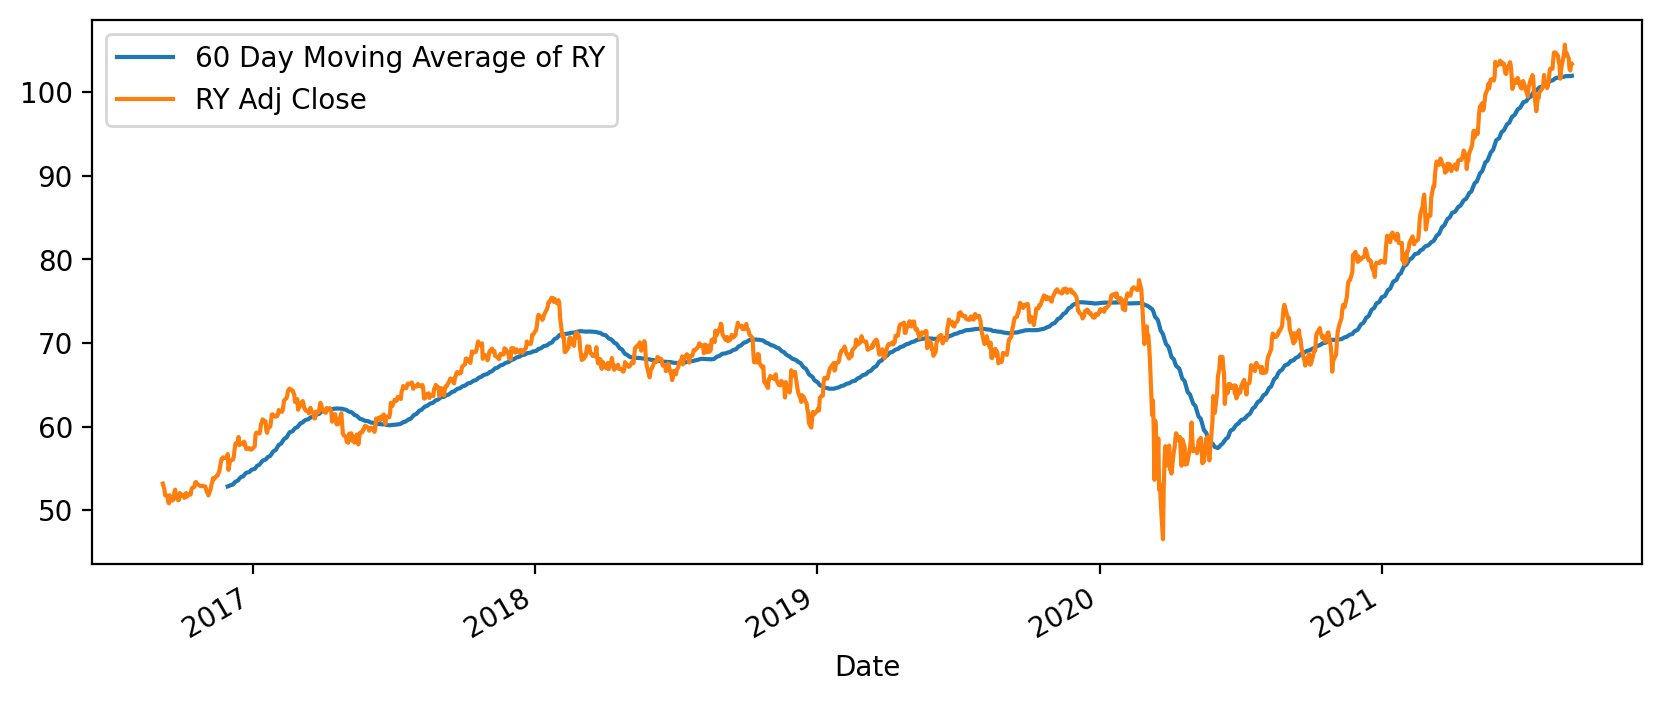

In [28]:
plt.figure(dpi=200,figsize=(10,4))
RY['Adj Close'].rolling(window=60).mean().plot(label='60 Day Moving Average of RY')
RY['Adj Close'].plot(label='RY Adj Close')
plt.legend()

Bollinger Bands

Text(0, 0.5, 'BAC Bollinger Bands')

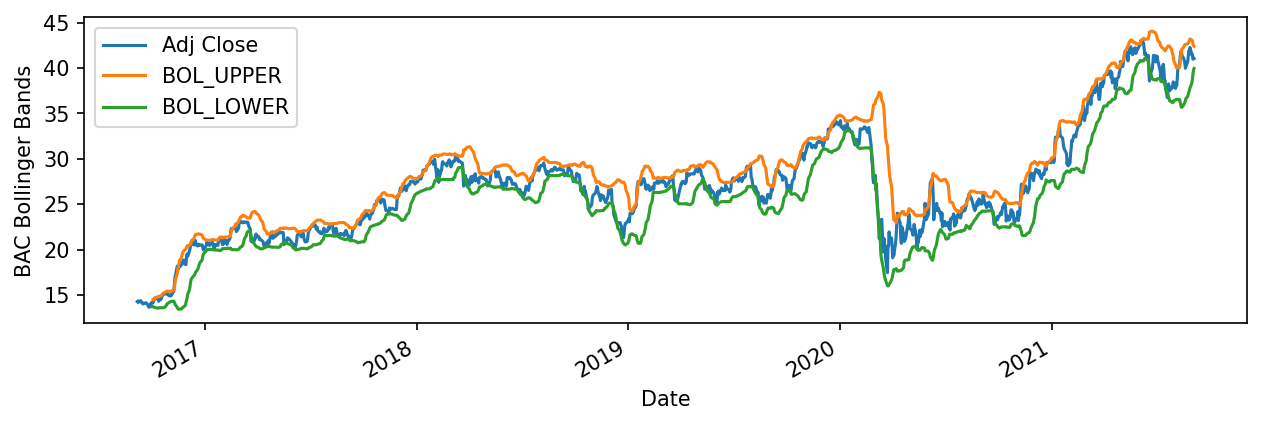

In [44]:
#Bollinger Bands for BAC
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
BAC['MA'] = BAC['Adj Close'].rolling(20).mean()
BAC['STD'] = BAC['Adj Close'].rolling(20).std()
BAC['BOL_UPPER'] = BAC['MA'] + 2*BAC['STD']
BAC['BOL_LOWER'] = BAC['MA'] - 2*BAC['STD']
BAC[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)
plt.ylabel('BAC Bollinger Bands')

Text(0, 0.5, 'JPM Bollinger Bands')

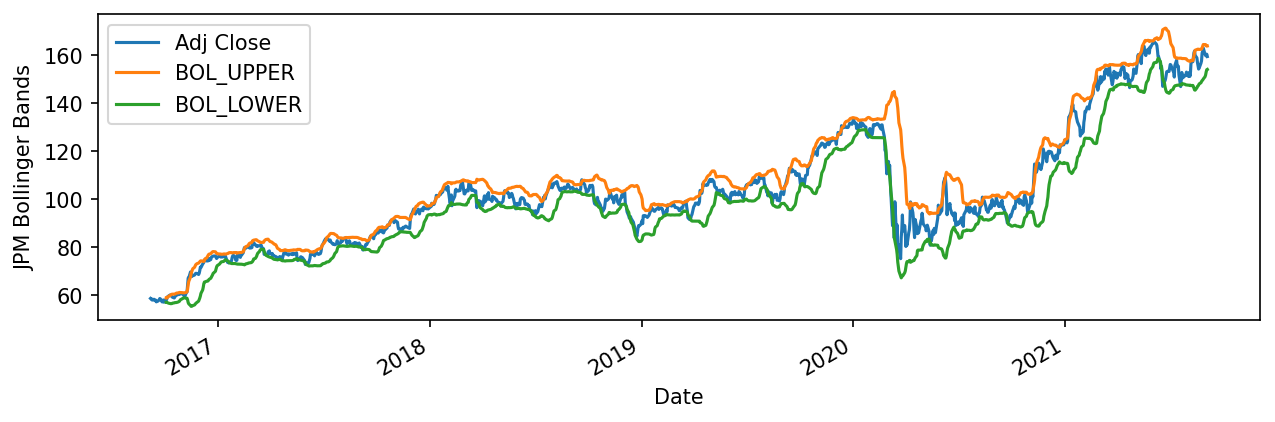

In [45]:
#Bollinger Bands for JPM
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
JPM['MA'] = JPM['Adj Close'].rolling(20).mean()
JPM['STD'] = JPM['Adj Close'].rolling(20).std()
JPM['BOL_UPPER'] = JPM['MA'] + 2*JPM['STD']
JPM['BOL_LOWER'] = JPM['MA'] - 2*JPM['STD']
JPM[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)
plt.ylabel('JPM Bollinger Bands')

Text(0, 0.5, 'Citi Group Bollinger Bands')

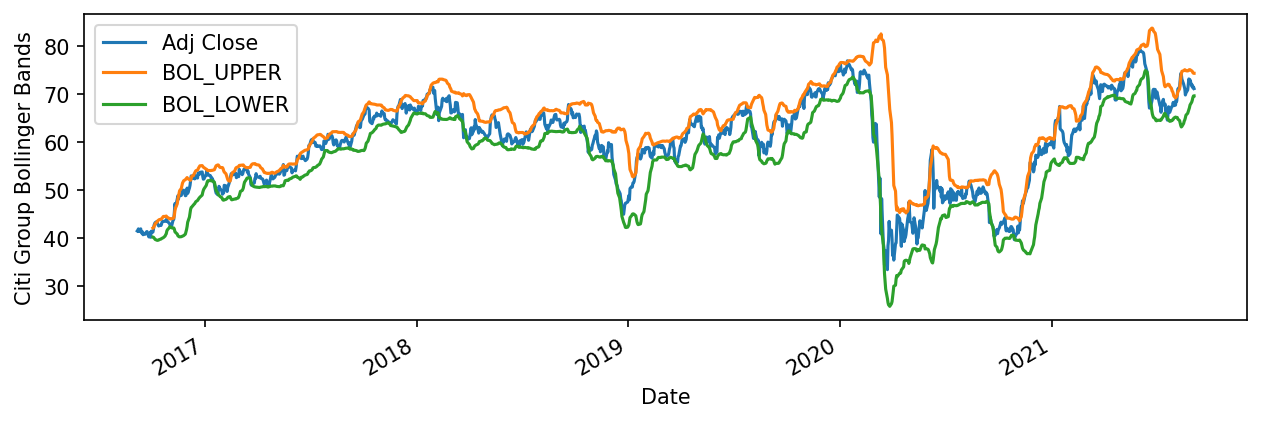

In [46]:
#Bollinger Bands for Citi Group
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
C['MA'] = C['Adj Close'].rolling(20).mean()
C['STD'] = C['Adj Close'].rolling(20).std()
C['BOL_UPPER'] = C['MA'] + 2*C['STD']
C['BOL_LOWER'] = C['MA'] - 2*C['STD']
C[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)
plt.ylabel('Citi Group Bollinger Bands')

Text(0, 0.5, 'HSBC Bollinger Bands')

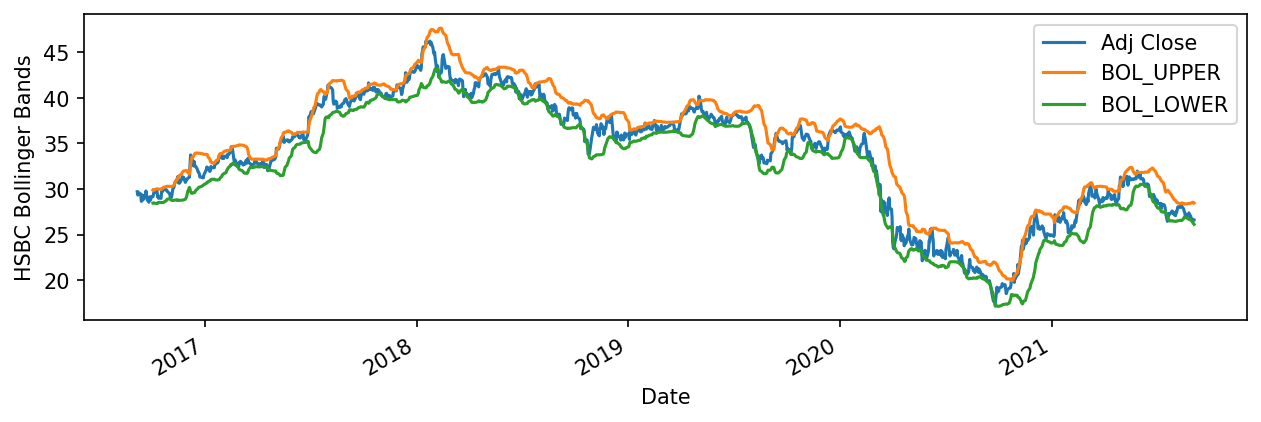

In [47]:
#Bollinger Band for HSBC
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
HSBC['MA'] = HSBC['Adj Close'].rolling(20).mean()
HSBC['STD'] = HSBC['Adj Close'].rolling(20).std()
HSBC['BOL_UPPER'] = HSBC['MA'] + 2*HSBC['STD']
HSBC['BOL_LOWER'] = HSBC['MA'] - 2*HSBC['STD']
HSBC[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)
plt.ylabel('HSBC Bollinger Bands')

Text(0, 0.5, 'RY Bollinger Bands')

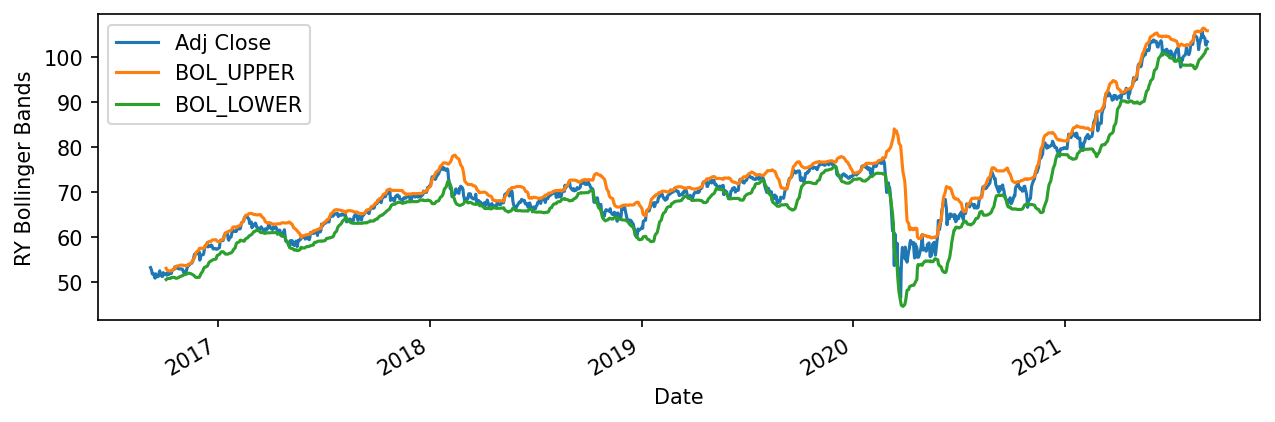

In [48]:
#Bollinger Bands for RY
fig,ax = plt.subplots(figsize=(10,3),dpi=150)
RY['MA'] = RY['Adj Close'].rolling(20).mean()
RY['STD'] = RY['Adj Close'].rolling(20).std()
RY['BOL_UPPER'] = RY['MA'] + 2*RY['STD']
RY['BOL_LOWER'] = RY['MA'] - 2*RY['STD']
RY[['Adj Close','BOL_UPPER','BOL_LOWER']].plot(ax=ax)
plt.ylabel('RY Bollinger Bands')